**Data Cleanning**

In [192]:
#Import all relevant libraries
import pandas as pd
import numpy as np

In [193]:
#read in data into pandas dataframe
data = pd.read_csv('all_schools_all_semesters_20191126.csv')
data.head()

,student_id,school,term,academicriskscore,engagementriskscore,financialriskscore,beliefriskscore,overallriskscore,whydidyouchoosethisschool,areyouthefirstpersoninyourfamily,...,engagement,financial,wellness,response_created,wheniwasinhighschool,ifihaveanissue,myparentsrelativessupportmefina,istruggletopayfortextbooks,year,returnedfall2019
0,1.0,1,fall 2019,0.0,0.0,0.0,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,1,fall 2018,2.0,12.0,4.0,0.0,18.0,Because it is close to work/home,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,1,spring 2019,2.0,12.0,4.0,0.0,18.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,1,fall 2019,0.0,0.0,0.0,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7.0,1,fall 2019,-1.0,5.0,1.0,NaN,7.0,It was the most affordable option,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [194]:
#Drop variables
variables_to_drop = ['academicriskscore', 'engagementriskscore', 'financialriskscore', 'beliefriskscore',
                     'overallriskscore', 'wellnessriskscore', 'id', 'ethnic_group_tr', 
                     'residency', 'citizenship', 'um_acad_prog1', 'um_acad_plan1', 'actcomposite', 
                     'hispanic', 'nonresalien', 'americanindian', 'asian', 'black', 'pacific', 'white',
                     'actionrsn', 'advisor', 'sport', 'eligterm', 'overallrisk', 'academic', 'engagement',
                     'financial', 'wellness', 'response_created', 'year', 'returnedfall2019', 'name', 'middle', 'f18_dropout', 
                     's19_dropout', 'returnedfall2019']


data = data.drop(variables_to_drop, 1)

In [195]:
#Drop students with no survey responses
data = data.dropna(subset=['doyouliveoncampus'])
data.shape[0]

2838

In [196]:
#check if we have any duplicated instance
duplicateRowsDF = data[data.duplicated(['student_id', 'term', 'school'])]

assert(duplicateRowsDF.shape[0] == 0)

In [197]:
#check how many dropouts we have and replace missing values with 0
data['dropout'] = data['dropout'].fillna(0)
data['dropout'].value_counts()

0.0    2658
1.0     180
Name: dropout, dtype: int64

In [198]:
#Check if we have dropouts for each school
data[['school', 'dropout']].groupby(['school']).agg(['mean', 'std', 'count'])

dropout                
            mean       std count
school                          
1       0.085583  0.279828  1741
2       0.006378  0.079655   784
3       0.083067  0.276426   313

In [199]:
#Check if we have dropouts for each term
data[['term', 'dropout']].groupby(['term']).agg(['mean', 'std', 'count'])

dropout                
                 mean       std count
term                                 
fall 2018    0.126645  0.332848   608
fall 2019    0.003041  0.055081  1644
spring 2019  0.167235  0.373505   586

In [200]:
#Create two columns for semseter and a year and drop original term variable and convert the semester to float
data[['Semester','Year']] = data.term.str.split(expand=True) 
data = data.drop('term',1)
data['Semester'] = (data['Semester'] == 'spring').astype(float)
data.head()

,student_id,school,whydidyouchoosethisschool,areyouthefirstpersoninyourfamily,pleasespecifyyourraceethnicity,doyouliveoncampus,doyouhaveanymajorfamilycommitmen,haveyoumetwithyouradvisororhavea,howlikelyareyoutorecommendyourun,iaminterestedinthecoursesthatiam,...,whichofthefollowingbestdescribes,doyouhavechildren,areyouanathlete,dropout,wheniwasinhighschool,ifihaveanissue,myparentsrelativessupportmefina,istruggletopayfortextbooks,Semester,Year
1,4.0,1,Because it is close to work/home,No,White,No,No,Yes,10,Agree,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,2018
2,4.0,1,NaN,NaN,NaN,No,No,Yes,10,Agree,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,2019
4,7.0,1,It was the most affordable option,No,Black or African American,Yes,No,Yes,.,Agree,...,To get a better job or make more money,No,No,0.0,NaN,NaN,NaN,NaN,0.0,2019
5,10.0,1,Other,Yes,Two or more races,Yes,No,No,7,Somewhat Agree,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,2018
6,10.0,1,NaN,NaN,NaN,Yes,No,Yes,6,Somewhat agree,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,2019


In [201]:
#Combine identical Questions
data.howlikelyareyoutorecommendyourun = np.where(data.howlikelyareyoutorecommendyourun == '.', np.NaN, data.howlikelyareyoutorecommendyourun)
data['howlikelyareyoutorecommendyourun'] = data['howlikelyareyoutorecommendyourun'].astype(float)
data.loc[data['howlikelyareyoutorecommendyoursc'] == 0, 'howlikelyareyoutorecommendyoursc'] = 1

data.howlikelyareyoutorecommendyoursc = np.where(data.howlikelyareyoutorecommendyoursc.isnull(), data.howlikelyareyoutorecommendyourun, data.howlikelyareyoutorecommendyoursc)
data = data.drop('howlikelyareyoutorecommendyourun',1)

data.iamscaredoffailingoneormoreofmyc = np.where(data.iamscaredoffailingoneormoreofmyc.isnull(), data.iamscaredoffailingmorethanoneofm, data.iamscaredoffailingoneormoreofmyc)
data = data.drop('iamscaredoffailingmorethanoneofm',1)

data.wheniwasinhighschoolialwaysknewi = np.where(data.wheniwasinhighschoolialwaysknewi.isnull(), data.wheniwasinhighschool, data.wheniwasinhighschoolialwaysknewi)
data =data.drop('wheniwasinhighschool', 1)
data.ifihaveanissueihavesomeonetoreac = np.where(data.ifihaveanissueihavesomeonetoreac.isnull(), data.ifihaveanissue, data.ifihaveanissueihavesomeonetoreac)
data = data.drop('ifihaveanissue',1)
data.myparentsrelativessupportmefinan = np.where(data.myparentsrelativessupportmefinan.isnull(), data.myparentsrelativessupportmefina ,data.myparentsrelativessupportmefinan)
data = data.drop('myparentsrelativessupportmefina',1)
data.istruggletopayfortextbooksrentut = np.where(data.istruggletopayfortextbooksrentut.isnull(),data.istruggletopayfortextbooks , data.istruggletopayfortextbooksrentut)
data = data.drop('istruggletopayfortextbooks',1)
data.mysociallifegetsinthewayofmedoin = np.where(data.mysociallifegetsinthewayofmedoin.isnull(),data.partyinggetsinthewayofmedoingwel , data.mysociallifegetsinthewayofmedoin)
data = data.drop('partyinggetsinthewayofmedoingwel',1)


In [202]:
#Create a list of lakert scale and one_hot variables
lakirt = ['iaminterestedinthecoursesthatiam', 'mycourseloadistoochallenging', 'iamscaredoffailingoneormoreofmyc',
          'thecoursesthatiamtakingwillhelpm', 'iamconfidentthatiwillgraduateint', 'myparentsrelativessupportmefinan',
          'istruggletopayfortextbooksrentut', 'iworryalotaboutpayingforschool', 'iwouldbenefitfromhelpmanagingmyf',
          'iamconsideringtakingabreakfromsc', 'ifeellikeifitintomyschool', 'ifihaveanissueihavesomeonetoreac',
          'ioftenattendeventsorganizedbyacl', 'wheniwasinhighschoolialwaysknewi',
          'ibelievethatacollegedegreeisvalu', 'iwasexcitedtoseemyfriendswhenica', 'mysociallifegetsinthewayofmedoin',
          'iexerciseatleasttwiceaweek', 'igetmorethan7hoursofsleeponmostn', 'ithinkthatiwillbesuccessfulatthi'
          ]

one_hot = ['whydidyouchoosethisschool', 'areyouthefirstpersoninyourfamily', 'pleasespecifyyourraceethnicity', 
           'doyouliveoncampus', 'doyouhaveanymajorfamilycommitmen', 'haveyoumetwithyouradvisororhavea', 
           'withwhatgenderdoyouidentify', 'didyoufailoneormoreofyourcourses', 'willyoubeworking20hoursaweekormo', 
           'whichofthefollowingbestdescribes', 'doyouhavechildren', 'areyouanathlete', 'iampayingforcollegeoutofpocketbu',
           "school"] 

In [203]:
#fill gender and race by student id and school
data['pleasespecifyyourraceethnicity'] = data.sort_values(['student_id', 'pleasespecifyyourraceethnicity']).groupby(['student_id'])['pleasespecifyyourraceethnicity'].ffill()

In [204]:
data['withwhatgenderdoyouidentify'] = data.sort_values(['student_id', 'withwhatgenderdoyouidentify']).groupby(['student_id'])['withwhatgenderdoyouidentify'].ffill()

In [205]:
#combine similar response
data['whydidyouchoosethisschool'] = np.where(data['whydidyouchoosethisschool'] == 'It has a good academic reputation', 'Because of its academic reputation', data['whydidyouchoosethisschool'])
data['whydidyouchoosethisschool'] = np.where(data['whydidyouchoosethisschool'] == 'It is close to work/home', 'Because it is close to work/home', data['whydidyouchoosethisschool'])
data['whydidyouchoosethisschool'] = np.where(data['whydidyouchoosethisschool'] == 'Because the schoolâs classes fit with my work schedule', 'It offers classes that fit my work schedule', data['whydidyouchoosethisschool'])

In [206]:
#Create a flag for missing lakirt variables
for i in lakirt:
    if True in data[i].isnull().values:
        data[i+'_mv'] = (data[i].isnull()).astype(int) 

data.head()

,student_id,school,whydidyouchoosethisschool,areyouthefirstpersoninyourfamily,pleasespecifyyourraceethnicity,doyouliveoncampus,doyouhaveanymajorfamilycommitmen,haveyoumetwithyouradvisororhavea,iaminterestedinthecoursesthatiam,mycourseloadistoochallenging,...,Semester,Year,iwouldbenefitfromhelpmanagingmyf_mv,ioftenattendeventsorganizedbyacl_mv,wheniwasinhighschoolialwaysknewi_mv,iwasexcitedtoseemyfriendswhenica_mv,mysociallifegetsinthewayofmedoin_mv,iexerciseatleasttwiceaweek_mv,igetmorethan7hoursofsleeponmostn_mv,ithinkthatiwillbesuccessfulatthi_mv
1,4.0,1,Because it is close to work/home,No,White,No,No,Yes,Agree,Disagree,...,0.0,2018,0,0,0,1,0,1,1,1
2,4.0,1,NaN,NaN,White,No,No,Yes,Agree,Somewhat agree,...,1.0,2019,0,0,1,0,0,1,1,1
4,7.0,1,It was the most affordable option,No,Black or African American,Yes,No,Yes,Agree,Disagree,...,0.0,2019,1,1,0,1,1,0,0,0
5,10.0,1,Other,Yes,Two or more races,Yes,No,No,Somewhat Agree,Disagree,...,0.0,2018,0,0,0,1,0,1,1,1
6,10.0,1,NaN,NaN,Two or more races,Yes,No,Yes,Somewhat agree,Disagree,...,1.0,2019,0,0,1,0,0,1,1,1


In [207]:
for column in lakirt:
    data[column].fillna(data[column].mode()[0], inplace=True)

In [208]:
#capitalize lakirt variables to treat Strongly disagree and Strongly Disagree as same
data[lakirt] = data[lakirt].applymap(lambda x : x.capitalize())
data[lakirt]

,iaminterestedinthecoursesthatiam,mycourseloadistoochallenging,iamscaredoffailingoneormoreofmyc,thecoursesthatiamtakingwillhelpm,iamconfidentthatiwillgraduateint,myparentsrelativessupportmefinan,istruggletopayfortextbooksrentut,iworryalotaboutpayingforschool,iwouldbenefitfromhelpmanagingmyf,iamconsideringtakingabreakfromsc,ifeellikeifitintomyschool,ifihaveanissueihavesomeonetoreac,ioftenattendeventsorganizedbyacl,wheniwasinhighschoolialwaysknewi,ibelievethatacollegedegreeisvalu,iwasexcitedtoseemyfriendswhenica,mysociallifegetsinthewayofmedoin,iexerciseatleasttwiceaweek,igetmorethan7hoursofsleeponmostn,ithinkthatiwillbesuccessfulatthi
1,Agree,Disagree,Disagree,Agree,Strongly agree,Agree,Disagree,Disagree,Agree,Disagree,Agree,Agree,Strongly agree,Strongly agree,Strongly agree,Agree,Strongly disagree,Strongly agree,Agree,Agree
2,Agree,Somewhat agree,Strongly disagree,Agree,Strongly agree,Agree,Disagree,Disagree,Somewhat agree,Disagree,Somewhat agree,Somewhat agree,Somewhat agree,Strongly agree,Agree,Somewhat agree,Disagree,Strongly agree,Agree,Agree
4,Agree,Disagree,Strongly agree,Strongly agree,Strongly agree,Somewhat agree,Disagree,Agree,Agree,Disagree,Disagree,Strongly disagree,Disagree,Somewhat agree,Agree,Agree,Disagree,Somewhat agree,Somewhat agree,Strongly agree
5,Somewhat agree,Disagree,Disagree,Somewhat agree,Strongly agree,Strongly disagree,Agree,Strongly agree,Strongly agree,Disagree,Somewhat agree,Disagree,Agree,Strongly agree,Strongly agree,Agree,Somewhat agree,Strongly agree,Agree,Agree
6,Somewhat agree,Disagree,Agree,Somewhat agree,Strongly agree,Strongly disagree,Agree,Strongly agree,Strongly agree,Disagree,Strongly disagree,Agree,Strongly disagree,Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree
8,Strongly agree,Somewhat agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Somewhat agree,Agree,Somewhat agree,Disagree,Agree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly agree,Somewhat agree,Strongly agree,Agree,Agree
10,Strongly agree,Somewhat agree,Somewhat agree,Strongly agree,Strongly agree,Strongly agree,Somewhat agree,Agree,Agree,Strongly disagree,Strongly agree,Somewhat agree,Strongly agree,Strongly agree,Strongly agree,Agree,Strongly disagree,Strongly agree,Agree,Agree
11,Somewhat agree,Somewhat agree,Strongly agree,Agree,Strongly agree,Somewhat agree,Agree,Agree,Agree,Disagree,Somewhat agree,Agree,Disagree,Somewhat agree,Agree,Agree,Disagree,Strongly disagree,Disagree,Strongly agree
15,Agree,Disagree,Disagree,Strongly agree,Strongly agree,Strongly agree,Disagree,Disagree,Agree,Disagree,Agree,Agree,Disagree,Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Somewhat agree,Agree
16,Agree,Disagree,Somewhat agree,Agree,Agree,Agree,Disagree,Strongly agree,Agree,Somewhat agree,Somewhat agree,Disagree,Disagree,Strongly agree,Strongly agree,Agree,Disagree,Agree,Disagree,Agree


In [209]:
if True in data['balancingworkandschoolistoostres'].isnull().values:
    data['balancingworkandschoolistoostres'+'_mv'] = (data['balancingworkandschoolistoostres'].isnull()).astype(int)

In [210]:
#seperately encode balncing work and schoo is stressful variable and generate work variable based on responses
data['balancingworkandschoolistoostres'].fillna(data['balancingworkandschoolistoostres'].mode()[0], inplace=True)
data['balancingworkandschoolistoostres'] = data['balancingworkandschoolistoostres'].map(lambda x : x.capitalize())

In [211]:
if 'Not applicable (i donât work)' in data['balancingworkandschoolistoostres'].values:
    data['not_work'] = (data['balancingworkandschoolistoostres'] == 'Not applicable (i donât work)').astype(int) 

In [212]:
data['work'] = (data['balancingworkandschoolistoostres'+'_mv'] == 0) & (data['not_work'] == 0)

In [213]:
data['work'] = data['work'].astype(int)

In [214]:
data['work'].value_counts()

0    1749
1    1089
Name: work, dtype: int64

In [215]:
data['balancingworkandschoolistoostres'].value_counts()

Disagree                           1948
Somewhat agree                      396
Agree                               214
Not applicable (i donât work)     105
Strongly agree                      103
Strongly disagree                    72
Name: balancingworkandschoolistoostres, dtype: int64

In [216]:
ord_map = {'Strongly disagree': 1, 'Disagree': 2, 
               'Somewhat agree': 5, 'Agree': 6, 'Strongly agree': 7, 'Not applicable (i donât work)': 4}

data['balancingworkandschoolistoostres'] = data['balancingworkandschoolistoostres'].map(ord_map)

In [217]:
#encode lakirt variables
gen_ord_map = {'Strongly disagree': 1, 'Disagree': 2, 
               'Somewhat agree': 5, 'Agree': 6, 'Strongly agree': 7}
for i in data[lakirt]:
    data[i] = data[i].map(gen_ord_map)

In [218]:
#fill missing on_hot variables
data[one_hot] = data[one_hot].fillna('missing')

In [219]:
#data[one_hot] = data[one_hot].astype('category')
data = pd.get_dummies(data, columns = one_hot)

In [220]:
data.head()

,student_id,iaminterestedinthecoursesthatiam,mycourseloadistoochallenging,iamscaredoffailingoneormoreofmyc,thecoursesthatiamtakingwillhelpm,iamconfidentthatiwillgraduateint,myparentsrelativessupportmefinan,istruggletopayfortextbooksrentut,iworryalotaboutpayingforschool,iwouldbenefitfromhelpmanagingmyf,...,areyouanathlete_No,areyouanathlete_Yes,areyouanathlete_missing,iampayingforcollegeoutofpocketbu_Agree,iampayingforcollegeoutofpocketbu_Disagree,iampayingforcollegeoutofpocketbu_Not applicable (I already have loans),iampayingforcollegeoutofpocketbu_missing,school_1,school_2,school_3
1,4.0,6,2,2,6,7,6,2,2,6,...,0,0,1,0,0,0,1,1,0,0
2,4.0,6,5,1,6,7,6,2,2,5,...,0,0,1,0,1,0,0,1,0,0
4,7.0,6,2,7,7,7,5,2,6,6,...,1,0,0,0,0,0,1,1,0,0
5,10.0,5,2,2,5,7,1,6,7,7,...,0,0,1,0,0,0,1,1,0,0
6,10.0,5,2,6,5,7,1,6,7,7,...,0,0,1,0,0,1,0,1,0,0


In [221]:
data_columns = list(data)

In [222]:
data_columns

['student_id',
 'iaminterestedinthecoursesthatiam',
 'mycourseloadistoochallenging',
 'iamscaredoffailingoneormoreofmyc',
 'thecoursesthatiamtakingwillhelpm',
 'iamconfidentthatiwillgraduateint',
 'myparentsrelativessupportmefinan',
 'istruggletopayfortextbooksrentut',
 'iworryalotaboutpayingforschool',
 'iwouldbenefitfromhelpmanagingmyf',
 'balancingworkandschoolistoostres',
 'iamconsideringtakingabreakfromsc',
 'ifeellikeifitintomyschool',
 'ifihaveanissueihavesomeonetoreac',
 'ioftenattendeventsorganizedbyacl',
 'wheniwasinhighschoolialwaysknewi',
 'ibelievethatacollegedegreeisvalu',
 'iwasexcitedtoseemyfriendswhenica',
 'mysociallifegetsinthewayofmedoin',
 'iexerciseatleasttwiceaweek',
 'igetmorethan7hoursofsleeponmostn',
 'ithinkthatiwillbesuccessfulatthi',
 'howlikelyareyoutorecommendyoursc',
 'dropout',
 'Semester',
 'Year',
 'iwouldbenefitfromhelpmanagingmyf_mv',
 'ioftenattendeventsorganizedbyacl_mv',
 'wheniwasinhighschoolialwaysknewi_mv',
 'iwasexcitedtoseemyfriendswhenica_m

In [223]:
#check that we have no missing values
True in data.isna().values

False

In [224]:
data.to_csv('Data_Clean_Mode.csv',sep=',', index = None)

**Exploratory Analysis**

In [225]:
data.dropout.describe()

count    2838.000000
mean        0.063425
std         0.243769
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: dropout, dtype: float64

In [226]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
student_id,2838.0,1802.466526,998.715395,2.0,939.25,1854.0,2685.25,3431.0
iaminterestedinthecoursesthatiam,2838.0,5.771318,1.066123,1.0,5.00,6.0,6.00,7.0
mycourseloadistoochallenging,2838.0,3.139535,1.666898,1.0,2.00,2.0,5.00,7.0
iamscaredoffailingoneormoreofmyc,2838.0,3.921424,2.268035,1.0,2.00,5.0,6.00,7.0
thecoursesthatiamtakingwillhelpm,2838.0,5.935166,1.155220,1.0,6.00,6.0,7.00,7.0
iamconfidentthatiwillgraduateint,2838.0,6.563425,0.744876,1.0,6.00,7.0,7.00,7.0
myparentsrelativessupportmefinan,2838.0,5.324877,1.895253,1.0,5.00,6.0,7.00,7.0
istruggletopayfortextbooksrentut,2838.0,3.449260,2.069143,1.0,2.00,2.0,5.00,7.0
iworryalotaboutpayingforschool,2838.0,4.648344,2.102003,1.0,2.00,5.0,6.00,7.0
iwouldbenefitfromhelpmanagingmyf,2838.0,5.676533,1.257064,1.0,6.00,6.0,6.00,7.0


In [175]:
data[['iamconsideringtakingabreakfromsc', 'dropout']].groupby(['iamconsideringtakingabreakfromsc']).agg(['mean', 'std', 'count'])

dropout                
                                      mean       std count
iamconsideringtakingabreakfromsc                          
1                                 0.028595  0.166737  1189
2                                 0.066822  0.249811  1287
5                                 0.133333  0.340693   225
6                                 0.246753  0.433949    77
7                                 0.183333  0.390205    60

In [176]:
data[['mysociallifegetsinthewayofmedoin', 'dropout']].groupby(['mysociallifegetsinthewayofmedoin']).agg(['mean', 'std', 'count'])

dropout                
                                      mean       std count
mysociallifegetsinthewayofmedoin                          
1                                 0.142857  0.350301   469
2                                 0.035234  0.184414  2157
5                                 0.160305  0.368297   131
6                                 0.204082  0.407206    49
7                                 0.187500  0.396558    32

In [177]:
data[['areyouthefirstpersoninyourfamily_Yes', 'dropout']].groupby(['areyouthefirstpersoninyourfamily_Yes']).agg(['mean', 'std', 'count'])

dropout                
                                          mean       std count
areyouthefirstpersoninyourfamily_Yes                          
0                                     0.065170  0.246880  2317
1                                     0.055662  0.229489   521

In [178]:
data.corr()

,student_id,iaminterestedinthecoursesthatiam,mycourseloadistoochallenging,iamscaredoffailingoneormoreofmyc,thecoursesthatiamtakingwillhelpm,iamconfidentthatiwillgraduateint,myparentsrelativessupportmefinan,istruggletopayfortextbooksrentut,iworryalotaboutpayingforschool,iwouldbenefitfromhelpmanagingmyf,...,areyouanathlete_No,areyouanathlete_Yes,areyouanathlete_missing,iampayingforcollegeoutofpocketbu_Agree,iampayingforcollegeoutofpocketbu_Disagree,iampayingforcollegeoutofpocketbu_Not applicable (I already have loans),iampayingforcollegeoutofpocketbu_missing,school_1,school_2,school_3
student_id,1.000000,-0.029823,-0.011077,0.060753,-0.031730,-0.034947,-0.044751,0.054121,0.039956,-0.027631,...,-0.016968,-0.040154,0.042384,0.022232,0.039769,0.071048,-0.085656,0.316772,-0.110700,-0.334417
iaminterestedinthecoursesthatiam,-0.029823,1.000000,-0.061377,-0.069243,0.465338,0.196926,0.054401,-0.018285,-0.016393,0.032632,...,-0.015246,-0.031999,0.035520,-0.005809,0.006780,-0.003293,0.000203,-0.041317,0.000951,0.062871
mycourseloadistoochallenging,-0.011077,-0.061377,1.000000,0.299297,-0.038134,-0.176611,-0.020156,0.165774,0.131007,0.081770,...,-0.061709,0.026791,0.045566,0.035774,0.007637,0.042756,-0.049740,-0.048597,-0.003024,0.079863
iamscaredoffailingoneormoreofmyc,0.060753,-0.069243,0.299297,1.000000,-0.047955,-0.184933,-0.037110,0.200784,0.236565,0.106431,...,-0.009919,-0.025529,0.026068,0.031923,-0.089135,0.031781,0.023207,0.110026,-0.096398,-0.033436
thecoursesthatiamtakingwillhelpm,-0.031730,0.465338,-0.038134,-0.047955,1.000000,0.197716,0.086579,-0.050187,-0.039295,0.053760,...,0.023681,0.018530,-0.035587,-0.016451,-0.015909,-0.024582,0.034530,-0.072749,0.025810,0.076249
iamconfidentthatiwillgraduateint,-0.034947,0.196926,-0.176611,-0.184933,0.197716,1.000000,0.047320,-0.088362,-0.083904,-0.042830,...,-0.019774,-0.008250,0.025177,-0.034281,0.058344,0.000388,-0.024989,-0.023244,0.007698,0.025145
myparentsrelativessupportmefinan,-0.044751,0.054401,-0.020156,-0.037110,0.086579,0.047320,1.000000,-0.384184,-0.257631,-0.051896,...,0.029545,0.093880,-0.088856,-0.051079,-0.003003,-0.058929,0.064317,-0.163288,0.178529,-0.001001
istruggletopayfortextbooksrentut,0.054121,-0.018285,0.165774,0.200784,-0.050187,-0.088362,-0.384184,1.000000,0.579732,0.168640,...,-0.126282,-0.100206,0.190647,0.122675,-0.006789,0.173051,-0.167757,0.196165,-0.228633,0.021413
iworryalotaboutpayingforschool,0.039956,-0.016393,0.131007,0.236565,-0.039295,-0.083904,-0.257631,0.579732,1.000000,0.234671,...,-0.099580,-0.085622,0.154484,0.096495,-0.061160,0.103254,-0.071830,0.118865,-0.137348,0.011276
iwouldbenefitfromhelpmanagingmyf,-0.027631,0.032632,0.081770,0.106431,0.053760,-0.042830,-0.051896,0.168640,0.234671,1.000000,...,0.243070,0.089470,-0.301994,0.009743,-0.228225,-0.047393,0.179901,-0.144417,0.159004,-0.002465


In [179]:
data.corr()["dropout"].nlargest(10)

dropout                                     1.000000
withwhatgenderdoyouidentify_missing         0.350593
iexerciseatleasttwiceaweek_mv               0.290714
igetmorethan7hoursofsleeponmostn_mv         0.290714
ithinkthatiwillbesuccessfulatthi_mv         0.290714
willyoubeworking20hoursaweekormo_missing    0.290714
whichofthefollowingbestdescribes_missing    0.290714
doyouhavechildren_missing                   0.290714
areyouanathlete_missing                     0.290714
didyoufailoneormoreofyourcourses_Yes        0.277587
Name: dropout, dtype: float64

In [180]:
import pandas_profiling

ModuleNotFoundError: No module named 'pandas_profiling'

In [181]:
pandas_profiling.ProfileReport(data)

NameError: name 'pandas_profiling' is not defined

In [182]:
import sys
from matplotlib import pyplot as plt
import sklearn.metrics as skm
def plotCorr(dat, lab, h, w):
    '''
    Do a heatmap to visualize the correlation matrix, dropping the label
    '''

    dat = dat.drop(lab, 1)
    #Get correlation and 0 out the diagonal (for plotting purposes)
    c_dat = dat.corr()
    for i in range(c_dat.shape[0]):
        c_dat.iloc[i,i] = 0

    c_mat = c_dat.as_matrix()
    #c_mat = c_mat[:-1, :-1]
    fig, ax = plt.subplots()
    heatmap = plt.pcolor(c_mat, cmap = plt.cm.RdBu)
 
    #Set the tick labels and center them
    ax.set_xticks(np.arange(c_dat.shape[0]) + 0.5, minor = False)
    ax.set_yticks(np.arange(c_dat.shape[1]) + 0.5, minor = False)
    ax.set_xticklabels(c_dat.index.values, minor = False, rotation = 45)
    ax.set_yticklabels(c_dat.index.values, minor = False)
    heatmap.axes.set_ylim(0, len(c_dat.index))  
    heatmap.axes.set_xlim(0, len(c_dat.index)) 
    plt.colorbar(heatmap, ax = ax)

    #plt.figure(figsize = (h, w))
    fig = plt.gcf()
    fig.set_size_inches(h, w)

In [183]:
lab = 'dropout'
X = data.drop(lab, 1)
Y = data[[lab]].values
cols = X.columns.values
mis = []

    #Start by getting MI
for c in cols:
    mis.append(skm.normalized_mutual_info_score(Y.ravel(), X[[c]].values.ravel()))

    #Get signs by correlation
corrs = data.corr()[lab]
corrs[corrs.index != lab]
df = pd.DataFrame(zip(mis, cols), columns = ['MI', 'Lab'])
df = pd.merge(df, pd.DataFrame(corrs), how = 'inner', left_on = 'Lab', right_index=True)
df_s = df.sort_values(by = ['MI'], ascending = False)
df_c = df.sort_values(by = ['dropout'], ascending = False)

/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 

/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 

In [184]:
df_s

,MI,Lab,dropout
0,0.148555,student_id,0.012185
62,0.137462,withwhatgenderdoyouidentify_missing,0.350593
68,0.122203,willyoubeworking20hoursaweekormo_missing,0.290714
26,0.122203,ioftenattendeventsorganizedbyacl_mv,-0.290714
25,0.122203,iwouldbenefitfromhelpmanagingmyf_mv,-0.290714
31,0.122203,igetmorethan7hoursofsleeponmostn_mv,0.290714
32,0.122203,ithinkthatiwillbesuccessfulatthi_mv,0.290714
33,0.122203,balancingworkandschoolistoostres_mv,-0.290714
29,0.122203,mysociallifegetsinthewayofmedoin_mv,-0.290714
30,0.122203,iexerciseatleasttwiceaweek_mv,0.290714


In [185]:
df_c[5:15]

,MI,Lab,dropout
68,0.122203,willyoubeworking20hoursaweekormo_missing,0.290714
75,0.122203,whichofthefollowingbestdescribes_missing,0.290714
78,0.122203,doyouhavechildren_missing,0.290714
64,0.111314,didyoufailoneormoreofyourcourses_Yes,0.277587
35,0.075151,work,0.243576
10,0.066128,balancingworkandschoolistoostres,0.238416
23,0.054731,Semester,0.217272
84,0.058482,iampayingforcollegeoutofpocketbu_Not applicabl...,0.211495
42,0.045925,whydidyouchoosethisschool_missing,0.195143
27,0.045925,wheniwasinhighschoolialwaysknewi_mv,0.195143


/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


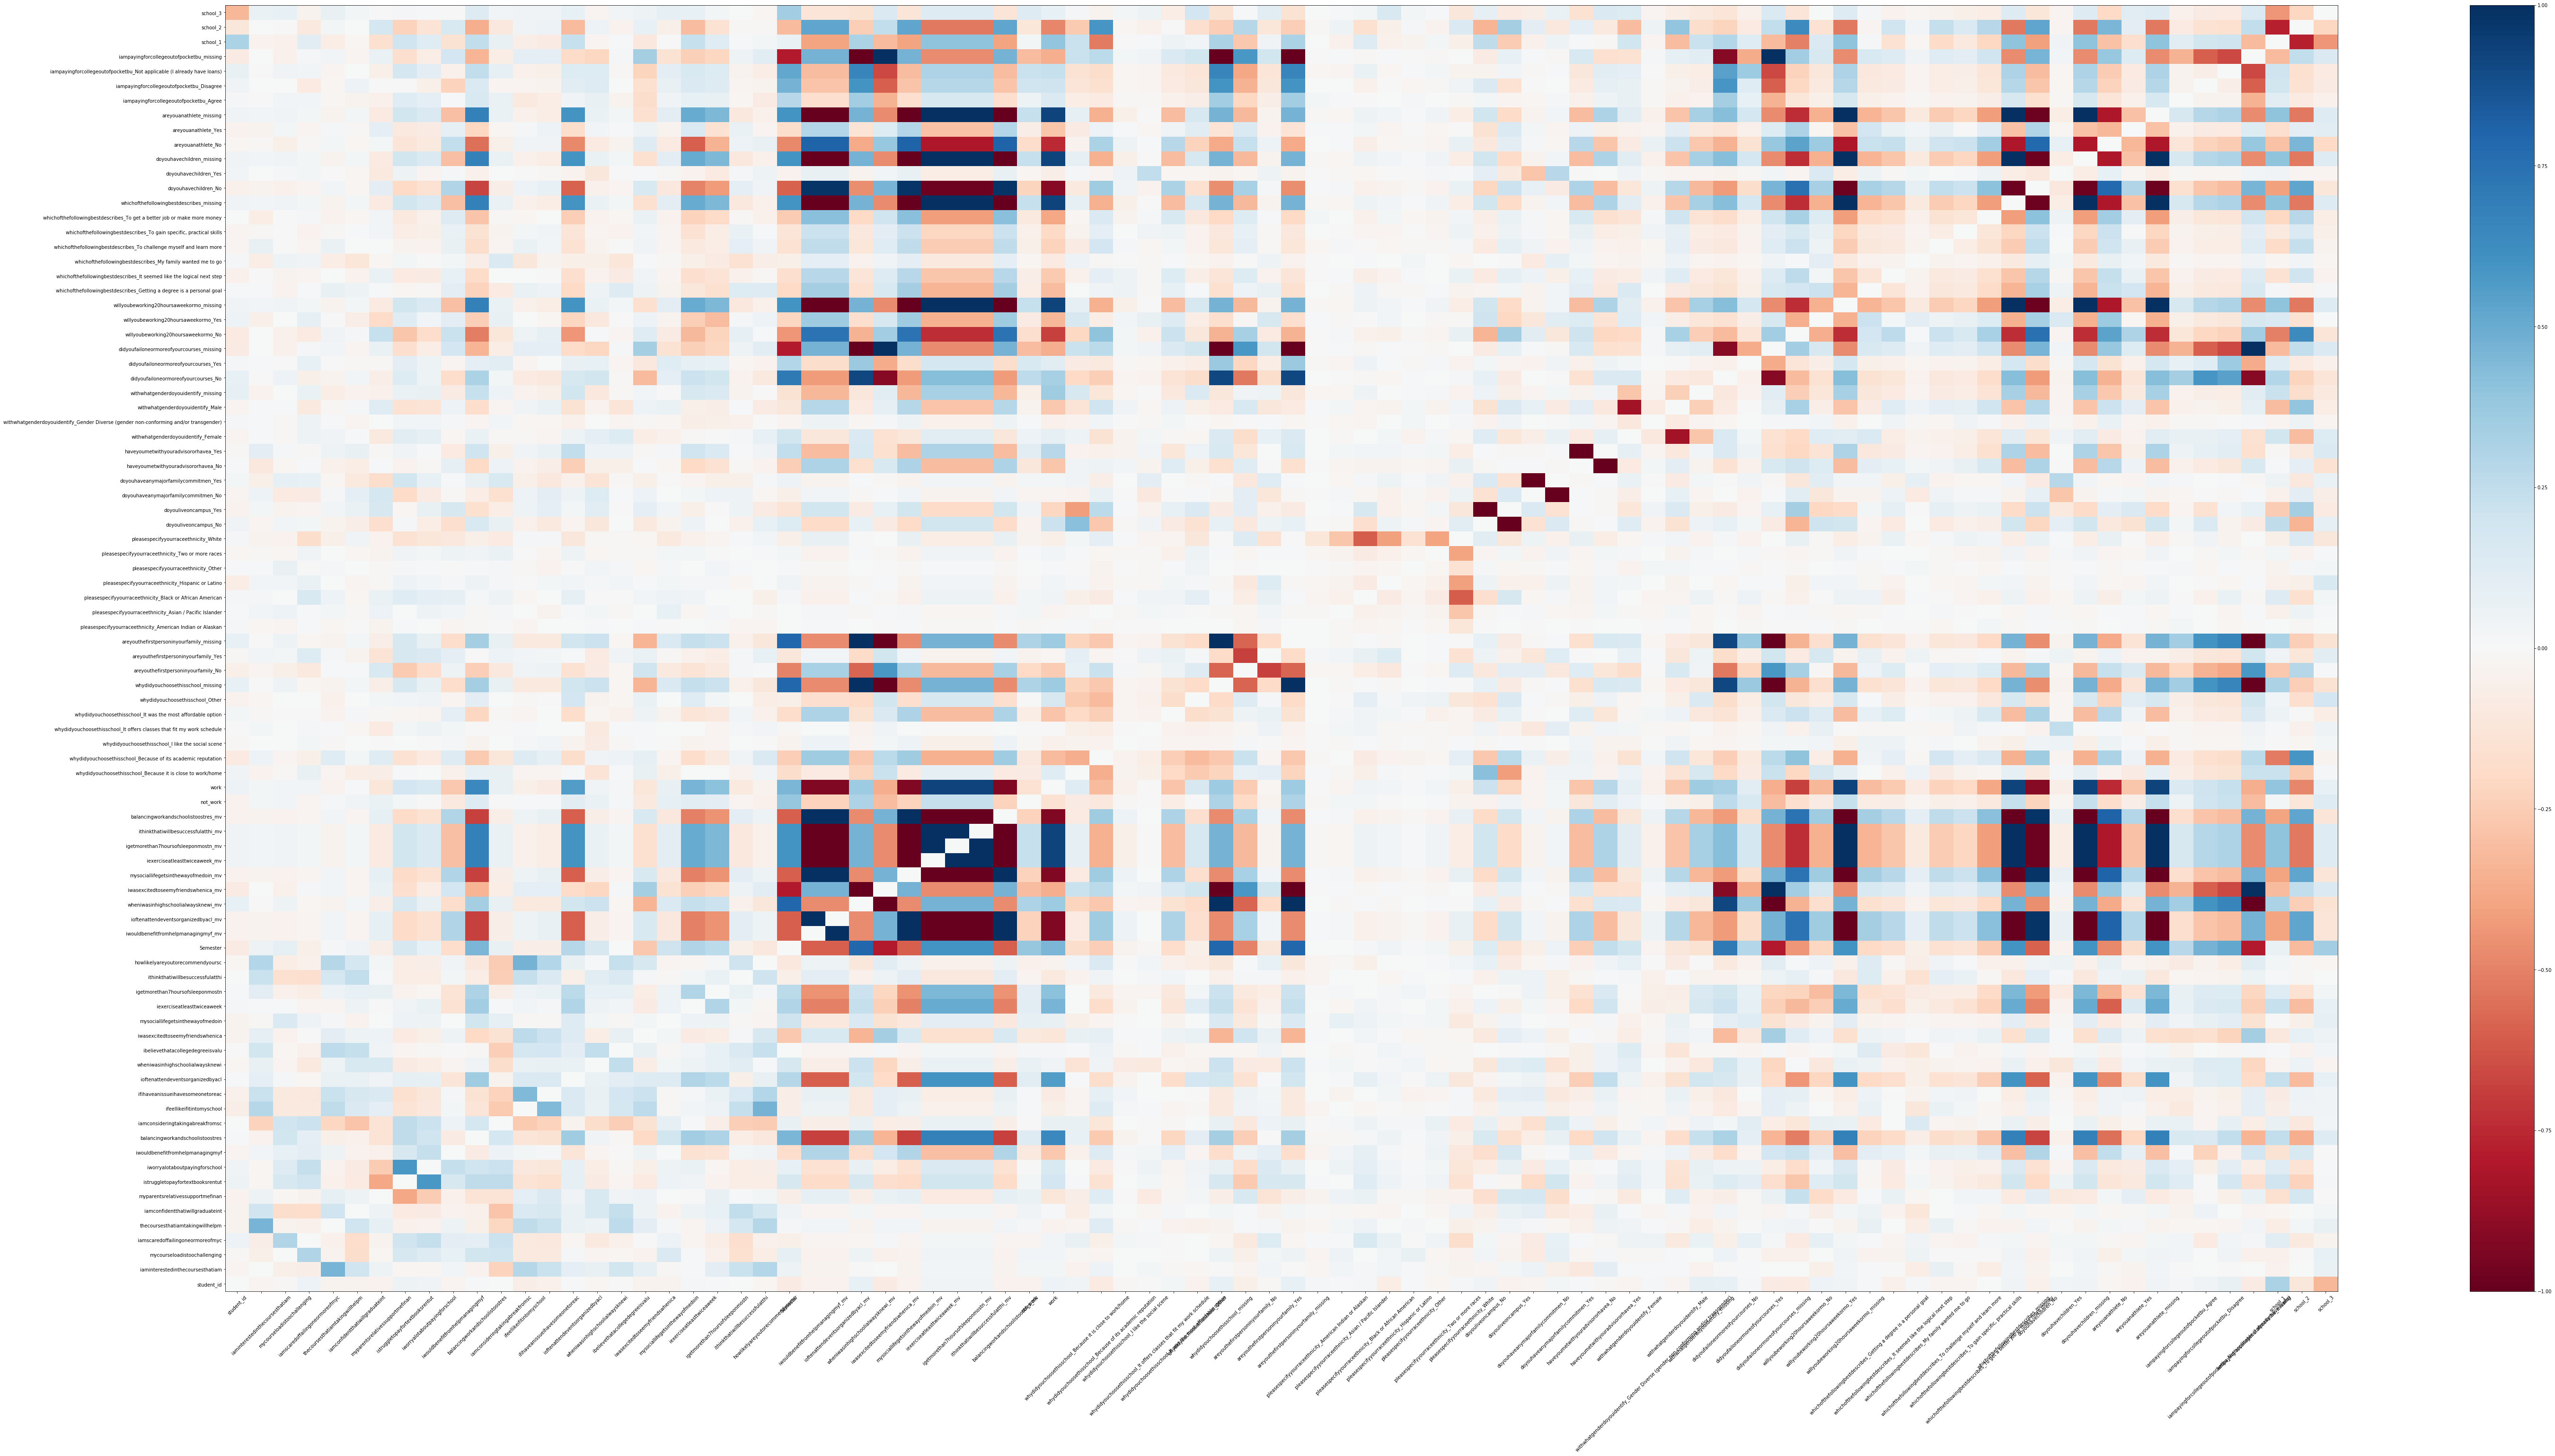

In [186]:
%matplotlib inline
import importlib
plotCorr(data, 'dropout', 100, 50)

In [1]:
data["dropout_2"][data["droupout"]==1]=0
data["dropout_2"][data["droupout"]==0]=1

NameError: name 'data' is not defined

In [123]:
# regular test, train, split (comment out everything underneath up to LR, Bernouilli, SVC, RF)
from sklearn.model_selection import train_test_split
X=data.drop("dropout",axis=1)
Y= data["dropout"]
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, train_size=0.8)

In [187]:
# build training, testing set
id_rand =np.random.permutation(data.shape[0])
train_id = id_rand[:int(data.shape[0]*0.8)]
test_id=id_rand[int(data.shape[0]*0.8):]
train_df,test_df = data.iloc[train_id,:], data.iloc[test_id,:]

In [188]:
# sampling prep
count_class_0, count_class_1 = train_df.dropout.value_counts()
df_class_0 = train_df[train_df['dropout'] == 0]
df_class_1 = train_df[train_df['dropout'] == 1]

In [68]:
# oversampling (comment out undersampling)
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_train_over = pd.concat([df_class_0, df_class_1_over], axis=0)

In [189]:
# undersampling (comment out oversampling)
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

In [190]:
# train,test,split
X_train = df_train_over.drop("dropout",axis=1)
Y_train=df_train_over['dropout']
X_test=test_df.drop("dropout",axis=1)
Y_test=test_df['dropout']

In [191]:
# LR, Bernouilli, SVC, RF
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr_classifier = LogisticRegression()
lr_classifier.fit(X_train,Y_train)
y_pred=lr_classifier.predict(X_test)
mat_lr=pd.DataFrame(confusion_matrix(Y_test, y_pred),columns=["Non Dropout", "Dropout"])
lr_pred_proba=lr_classifier.predict_proba(X_test)
lr_fpr, lr_tpr, lr_threshold = metrics.roc_curve(Y_test, lr_pred_proba[:,1])
lr_auc = metrics.auc(lr_fpr, lr_tpr)
plt.plot(lr_fpr, lr_tpr, label = 'LR AUC = %0.4f' %lr_auc)


from sklearn.naive_bayes import BernoulliNB
b_classifier = BernoulliNB()
b_classifier.fit(X_train,Y_train)
y_pred=b_classifier.predict(X_test)
mat_b=pd.DataFrame(confusion_matrix(Y_test, y_pred),columns=["Non Dropout", "Dropout"])
b_pred_proba=b_classifier.predict_proba(X_test)
b_fpr, b_tpr, b_threshold = metrics.roc_curve(Y_test, b_pred_proba[:,1])
b_auc = metrics.auc(b_fpr, b_tpr)
plt.plot(b_fpr, b_tpr, label = 'Bernouilli AUC = %0.4f' %b_auc)

from sklearn.svm import SVC
svc_classifier = SVC(probability=True)
svc_classifier.fit(X_train,Y_train)
y_pred=svc_classifier.predict(X_test)
mat_svc=pd.DataFrame(confusion_matrix(Y_test, y_pred),columns=["Non Dropout", "Dropout"])
svc_pred_proba=svc_classifier.predict_proba(X_test)
svc_fpr, svc_tpr, svc_threshold = metrics.roc_curve(Y_test, svc_pred_proba[:,1])
svc_auc = metrics.auc(svc_fpr, svc_tpr)
plt.plot(svc_fpr, svc_tpr, label = 'SVC AUC = %0.4f' %svc_auc)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)
mat_rf=pd.DataFrame(confusion_matrix(Y_test, y_pred),columns=["Non Dropout", "Dropout"])
clf_pred_proba=clf.predict_proba(X_test)
clf_fpr, clf_tpr, clf_threshold = metrics.roc_curve(Y_test, clf_pred_proba[:,1])
clf_auc = metrics.auc(clf_fpr, clf_tpr)
plt.plot(clf_fpr, clf_tpr, label = 'RF AUC = %0.4f' %clf_auc)

plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

mat_rf

/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: X has 89 features per sample; expecting 87

In [68]:
# Random Forest: shuffle, cross validation, undersampling


from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold


def xValRF(dataset,k):
    kf = KFold(n_splits=k)
    aucs=[]
    data_new=dataset.sample(frac=1)
    data_new.reset_index()
    for train_index, test_index in kf.split(data_new):
        train_df = data_new.iloc[train_index]
        test_df=data_new.iloc[test_index]
        
        count_class_0, count_class_1 = train_df.dropout.value_counts()
        df_class_0 = train_df[train_df['dropout'] == 0]
        df_class_1 = train_df[train_df['dropout'] == 1]
        df_class_0_under = df_class_0.sample(count_class_1)
        df_train_under = pd.concat([df_class_0_under, df_class_1], axis=0)
        
        X_train = df_train_over.drop("dropout",axis=1)
        Y_train= df_train_over['dropout']
        X_test= test_df.drop("dropout",axis=1)
        Y_test=test_df['dropout']
        
        clf = RandomForestClassifier()
        clf.fit(X_train,Y_train)
        y_pred=clf.predict(X_test)
        mat_rf=pd.DataFrame(confusion_matrix(Y_test, y_pred),columns=["Non Dropout", "Dropout"])
        clf_pred_proba=clf.predict_proba(X_test)
        clf_fpr, clf_tpr, clf_threshold = metrics.roc_curve(Y_test, clf_pred_proba[:,1])
        clf_auc = metrics.auc(clf_fpr, clf_tpr)
        plt.plot(clf_fpr, clf_tpr, label = 'RF AUC = %0.4f' %clf_auc)
        aucs.append(clf_auc)
        print(mat_rf)
    plt.legend(loc = 'lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return aucs

In [69]:
# Support Vector Machine: shuffle, cross validation, undersampling


from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import KFold


def xValSVC(dataset,k):
    kf = KFold(n_splits=k)
    aucs=[]
    data_new=dataset.sample(frac=1)
    data_new.reset_index()
    for train_index, test_index in kf.split(data_new):
        train_df = data_new.iloc[train_index]
        test_df=data_new.iloc[test_index]
        
        count_class_0, count_class_1 = train_df.dropout.value_counts()
        df_class_0 = train_df[train_df['dropout'] == 0]
        df_class_1 = train_df[train_df['dropout'] == 1]
        df_class_0_under = df_class_0.sample(count_class_1)
        df_train_under = pd.concat([df_class_0_under, df_class_1], axis=0)
        
        X_train = df_train_over.drop("dropout",axis=1)
        Y_train= df_train_over['dropout']
        X_test= test_df.drop("dropout",axis=1)
        Y_test=test_df['dropout']
        
        svc_classifier = SVC(probability=True)
        svc_classifier.fit(X_train,Y_train)
        y_pred=svc_classifier.predict(X_test)
        mat_svc=pd.DataFrame(confusion_matrix(Y_test, y_pred),columns=["Non Dropout", "Dropout"])
        svc_pred_proba=svc_classifier.predict_proba(X_test)
        svc_fpr, svc_tpr, svc_threshold = metrics.roc_curve(Y_test, svc_pred_proba[:,1])
        svc_auc = metrics.auc(svc_fpr, svc_tpr)
        plt.plot(svc_fpr, svc_tpr, label = 'SVC AUC = %0.4f' %svc_auc)
        aucs.append(svc_auc)
        print(mat_svc)
    plt.legend(loc = 'lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return aucs

In [2]:
# Naive Bayes: shuffle, cross validation, undersampling

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import KFold


def xValB(dataset,k):
    kf = KFold(n_splits=k)
    aucs=[]
    data_new=dataset.sample(frac=1)
    data_new.reset_index()
    for train_index, test_index in kf.split(data_new):
        train_df = data_new.iloc[train_index]
        test_df=data_new.iloc[test_index]
        
        count_class_0, count_class_1 = train_df.dropout.value_counts()
        df_class_0 = train_df[train_df['dropout'] == 0]
        df_class_1 = train_df[train_df['dropout'] == 1]
        df_class_0_under = df_class_0.sample(count_class_1)
        df_train_under = pd.concat([df_class_0_under, df_class_1], axis=0)
        
        X_train = df_train_over.drop("dropout",axis=1)
        Y_train= df_train_over['dropout']
        X_test= test_df.drop("dropout",axis=1)
        Y_test=test_df['dropout']
        
        b_classifier = CategoricalNB()
        b_classifier.fit(X_train,Y_train)
        y_pred=b_classifier.predict(X_test)
        mat_b=pd.DataFrame(confusion_matrix(Y_test, y_pred),columns=["Non Dropout", "Dropout"])
        b_pred_proba=b_classifier.predict_proba(X_test)
        b_fpr, b_tpr, b_threshold = metrics.roc_curve(Y_test, b_pred_proba[:,1])
        b_auc = metrics.auc(b_fpr, b_tpr)
        plt.plot(b_fpr, b_tpr, label = 'Bernouilli AUC = %0.4f' %b_auc)
        aucs.append(b_auc)
        print(mat_b)
    plt.legend(loc = 'lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return aucs

ImportError: cannot import name 'CategoricalNB' from 'sklearn.naive_bayes' (/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py)

In [71]:
# Logistic regression: shuffle, cross validation, undersampling
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import KFold


def xValLR(dataset,k):
    kf = KFold(n_splits=k)
    aucs=[]
    data_new=dataset.sample(frac=1)
    data_new.reset_index()
    for train_index, test_index in kf.split(data_new):
        train_df = data_new.iloc[train_index]
        test_df=data_new.iloc[test_index]
        
        count_class_0, count_class_1 = train_df.dropout.value_counts()
        df_class_0 = train_df[train_df['dropout'] == 0]
        df_class_1 = train_df[train_df['dropout'] == 1]
        df_class_0_under = df_class_0.sample(count_class_1)
        df_train_under = pd.concat([df_class_0_under, df_class_1], axis=0)
        
        X_train = df_train_over.drop("dropout",axis=1)
        Y_train= df_train_over['dropout']
        X_test= test_df.drop("dropout",axis=1)
        Y_test=test_df['dropout']
        lr_classifier = LogisticRegression()
        lr_classifier.fit(X_train,Y_train)
        y_pred=lr_classifier.predict(X_test)
        mat_lr=pd.DataFrame(confusion_matrix(Y_test, y_pred),columns=["Non Dropout", "Dropout"])
        lr_pred_proba=lr_classifier.predict_proba(X_test)
        lr_fpr, lr_tpr, lr_threshold = metrics.roc_curve(Y_test, lr_pred_proba[:,1])
        lr_auc = metrics.auc(lr_fpr, lr_tpr)
        plt.plot(lr_fpr, lr_tpr, label = 'LR AUC = %0.4f' %lr_auc)
        aucs.append(lr_auc)
        print(mat_lr)
    plt.legend(loc = 'lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return aucs

In [3]:
# Run each classification with cross validation
aucs_rf=xValRF(data, 5)
aucs_svc=xValSVC(data,5)
aucs_b=xValB(data,5)
aucs_lr=xValLR(data, 5)

NameError: name 'xValRF' is not defined

In [77]:
# Mean of each classifier for each fold of cross validation
print(np.mean(aucs_rf),np.mean(aucs_svc),np.mean(aucs_b),np.mean(aucs_lr))

0.9881846970776721 0.9646072964968075 0.8717886365525811 0.9424642114186008


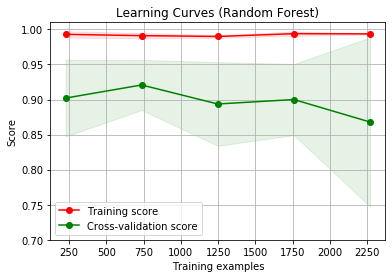

In [82]:
# Learning curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


X, y = data.drop("dropout",axis=1),data["dropout"]
title = "Learning Curves (Random Forest)"
estimator = RandomForestClassifier()
plot_learning_curve(estimator, title, data.drop("dropout",axis=1),data["dropout"], ylim=(0.7, 1.01), cv=5, n_jobs=4)


plt.show()

In [ ]:
dropout_id=data["student_id"][data["dropout"]==1]
idd= data["student_id"][(data["dropout"]==0)&(data["student_id"].isin(dropout_id))]
data["Semester"][(data["student_id"].isin(idd))&(data["dropout"]==1)].value_counts()
# data["Semester"][(data["dropout"]==0)&(data["student_id"].isin(dropout_id))].value_counts()
# repeat_id = data["student_id"][(data["dropout"]==0)&(data["Year"]=="2018")&(data["Semester"]==0)]
# start = data[(data["student_id"].isin(repeat_id))&(data["Year"]=="2019")&(data["Semester"]==0)]
# # new_data=data[(data["student_id"].isin(repeat_id))]
# start["dropout"].value_counts()
# dropout_id
# data[["Year","Semester","dropout"]][data["student_id"]==10.0]
# data["Semester"][data["dropout"]==1].value_counts()

# Students dropout in Fall 2018 and non dropout in Spring 2019